___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

In [122]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# Decision Trees
## Classification

Let us start, again, with the iris dataset. Following the same flow, it is now easy to train a Decision Tree Model

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [123]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    train_size=.75,
                                                    random_state=42)

dtc = DecisionTreeClassifier(
    random_state=42,
).fit(X_train, y_train)

With a perfect score on training

In [124]:
score = dtc.score(X_train, y_train)
score   

1.0

and also in test...!

In [125]:
score = dtc.score(X_test, y_test)
score   

1.0

Ater this we can plot the tree

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = v

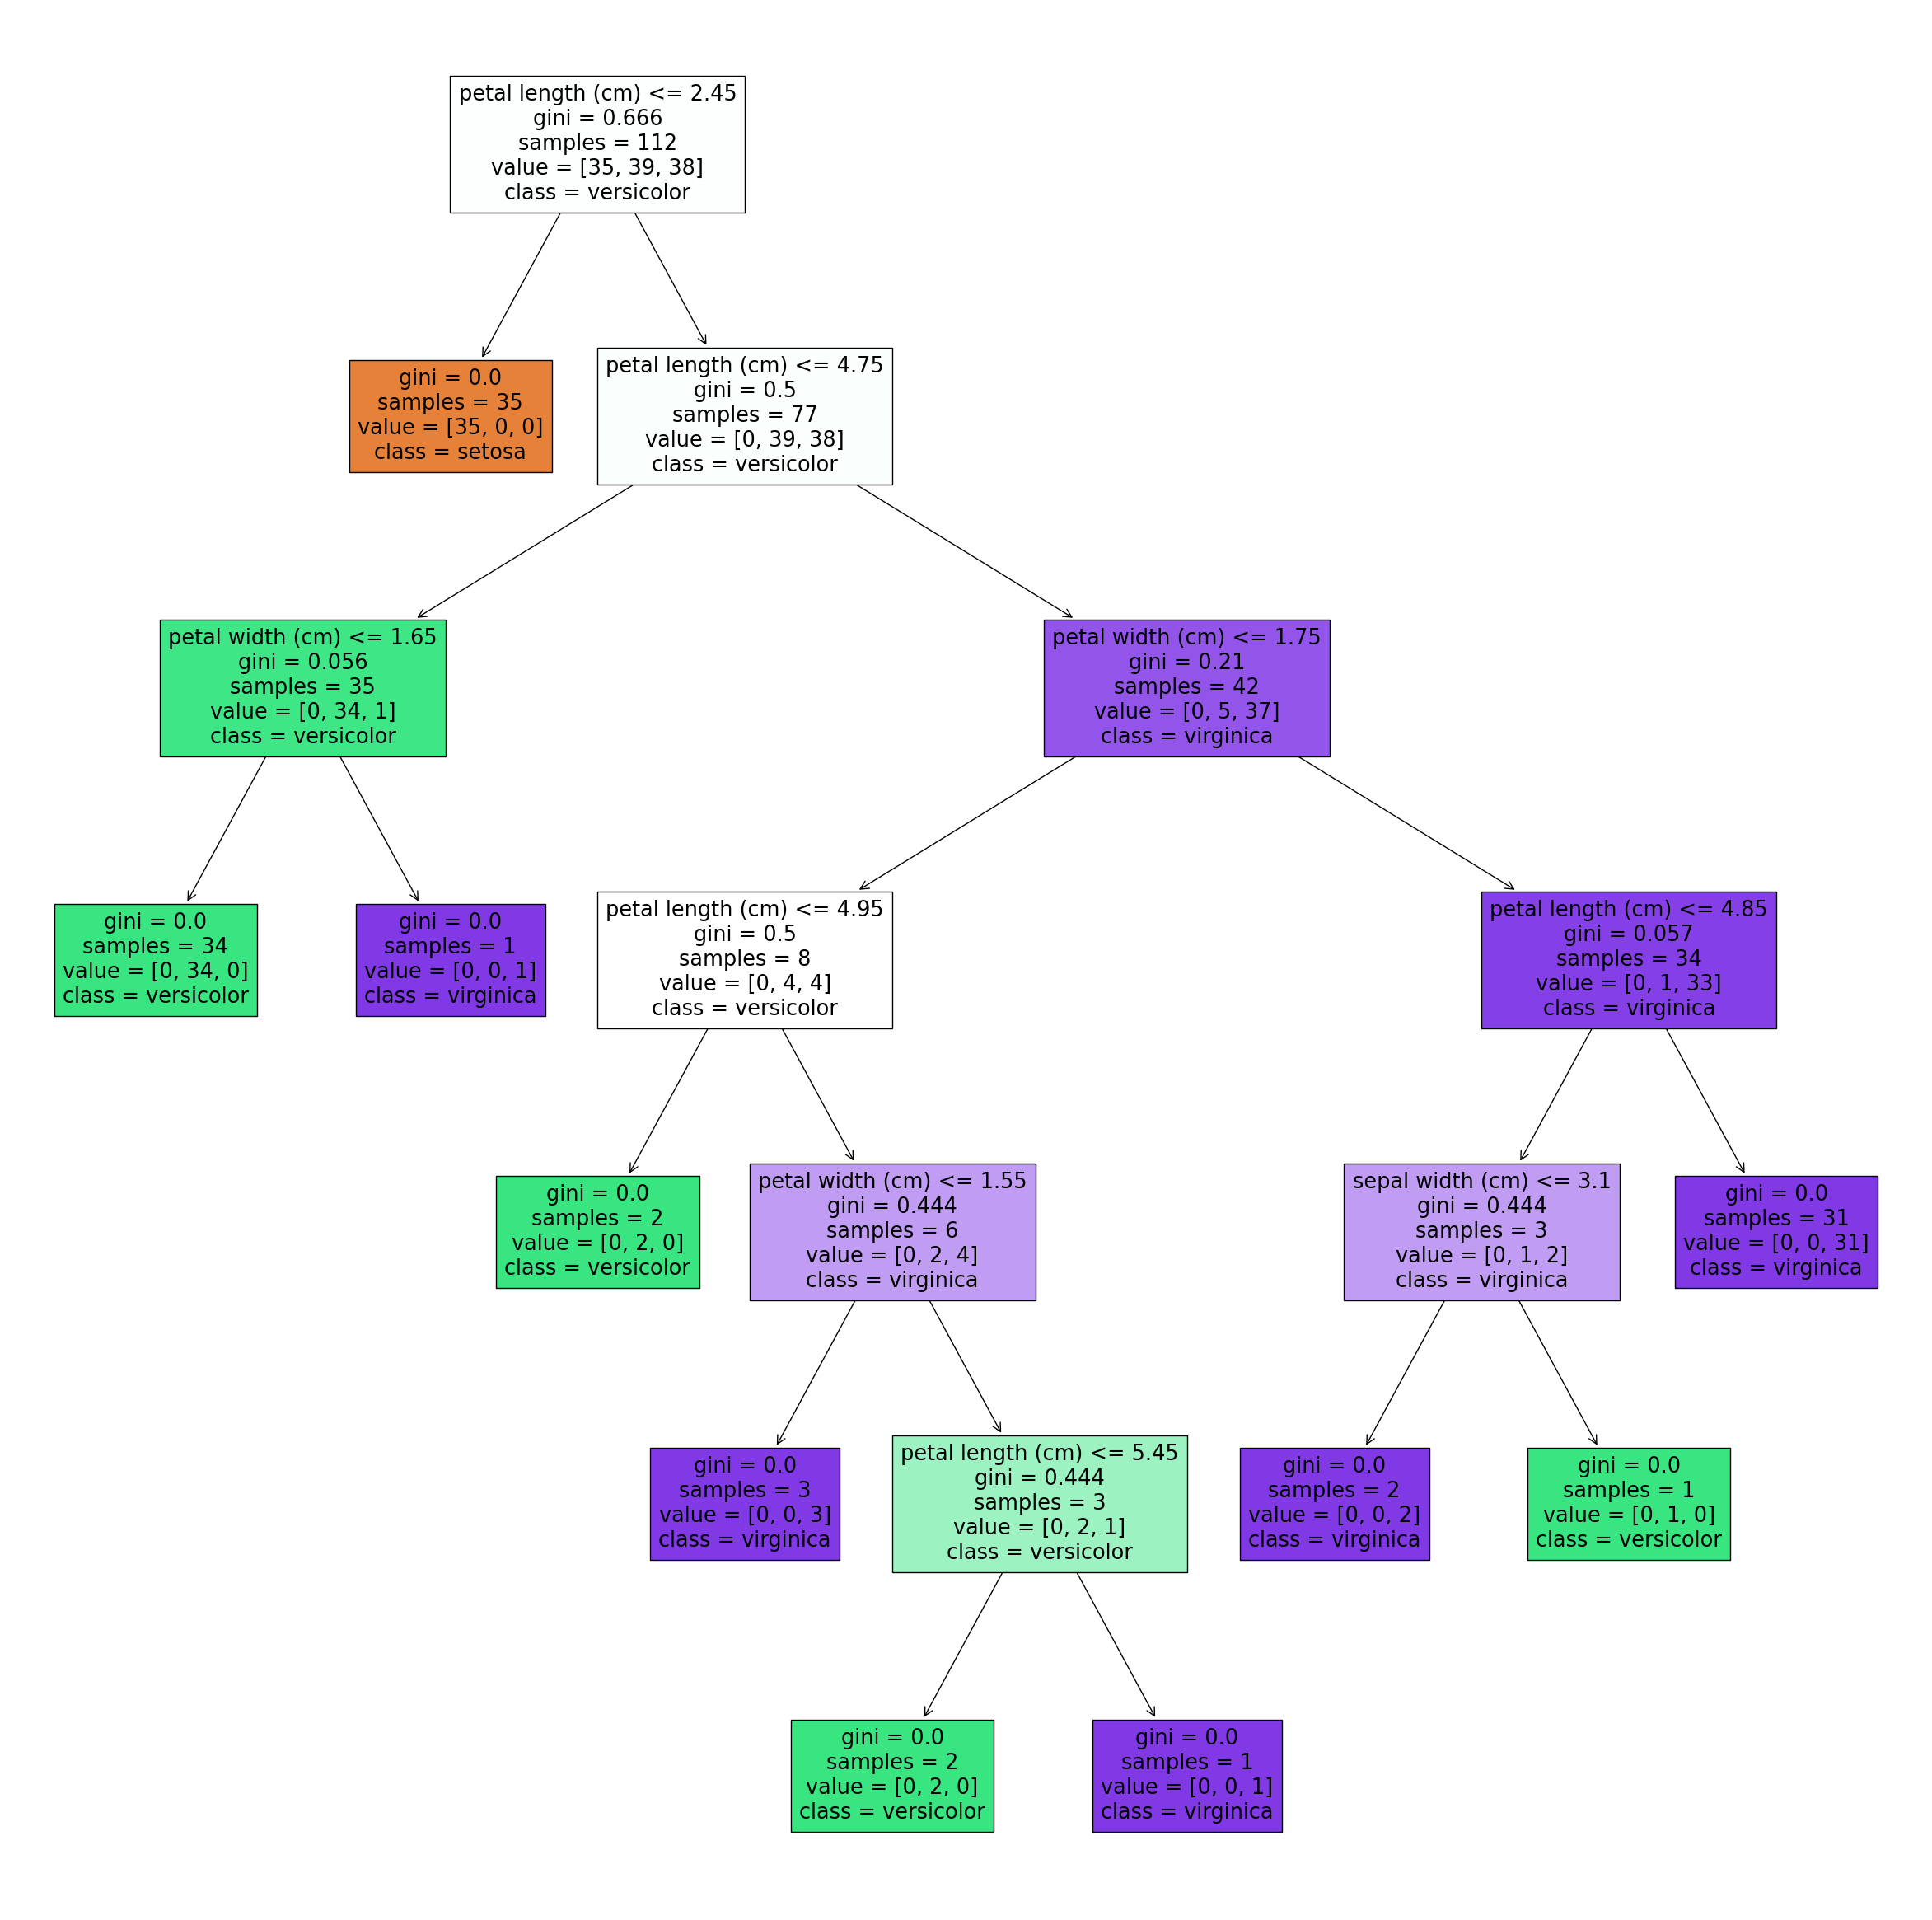

In [126]:
fig, axes = plt.subplots(figsize = (30, 30))

tree.plot_tree(
    dtc,
    feature_names = iris.feature_names,
    class_names=iris.target_names,
    filled = True
)

Use the tree to predict some of the test examples...

In [127]:
print(iris.feature_names, '\n', X_test[:5], '\n', iris.target_names[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]] 
 ['setosa' 'versicolor' 'virginica']


If we do some cross validation
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) using a stratified shuffle split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) that is not so perfect!

In the first example, then minimum number of samples required to be at a leaf node is 1. 

In [128]:
skf = StratifiedShuffleSplit(
    n_splits=10,
    random_state=1
)

clf = DecisionTreeClassifier(
    random_state=1
)

scores = cross_val_score(
    clf,
    iris.data, iris.target, 
    cv=skf
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[0.93333333 0.93333333 0.8        0.93333333 0.93333333 0.86666667
 1.         0.86666667 0.93333333 0.93333333]
mu:0.9133333333333334


In the second example, we increase minimum number of samples required to be at a leaf node to be 3, giving a slight increase in performance

In [129]:
clf = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf = 3,
)

scores = cross_val_score(
    clf,
    iris.data, iris.target, 
    cv=skf
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 1.         0.86666667 0.93333333 0.93333333]
mu:0.9400000000000001


## Regression
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Let us consider the Seoul Bike Sharing Demand dataset. The dataset contains the hourly count of rental bikes between years 2017 and 2018 in Seoul, Korea with the corresponding weather and seasonal information. The dataset can be downloaded from https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand but we have already downloaded it and saved it in the data folder.

Let us start by loading the dataset into a pandas dataframe. 

In [130]:
import pandas as pd
df = pd.read_csv('./../Datasets/SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


By calling the dataframe's info method, we can see that there are no missing values but there are some categorical columns.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

The categorical columns need to be converted into, for example, dummy variables. 

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. In research design, a dummy variable is often used to distinguish different treatment groups. for example the season column has four categories: Spring, Summer, Autumn, and Winter. We can convert this column into four columns, one for each category, and use 0 or 1 to indicate if the sample belongs to that category or not. To achieve this, we can use the pandas get_dummies method.

In [132]:
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,True,True,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,False,False,False,True,True
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,False,False,False,True,True
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,False,False,False,True,True
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,False,False,False,True,True


We can split this column into two columns: month and day, and day of week. To achieve this, we can use the pandas to_datetime method as follows:

In [133]:
# make sure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# create new columns for month, day, and day of week
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week

# drop the original date column
df.drop('Date', axis=1, inplace=True)

Let us now recheck the dataframe's info method.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons_Spring            8760 non-null   bool   
 11  Seasons_Summer            8760 non-null   bool   
 12  Seasons_Winter            8760 non-null   bool   
 13  Holiday_No Holiday        8760 non-null   bool   
 14  Function

Since the target variable is the Rented Bike Count, we can split the dataframe into two dataframes: one with the target variable and another with the remaining variables.

In [135]:
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

Now, we can split the data into training and test sets.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    shuffle=True,
    random_state=42,
    test_size=0.1
)

Define the regressor and do the training

In [137]:
dtr = DecisionTreeRegressor(
    random_state=0
).fit(X_train, y_train)     

Finaly, we score it

In [138]:
score = dtr.score(X_test, y_test)
score  

0.876074032908466

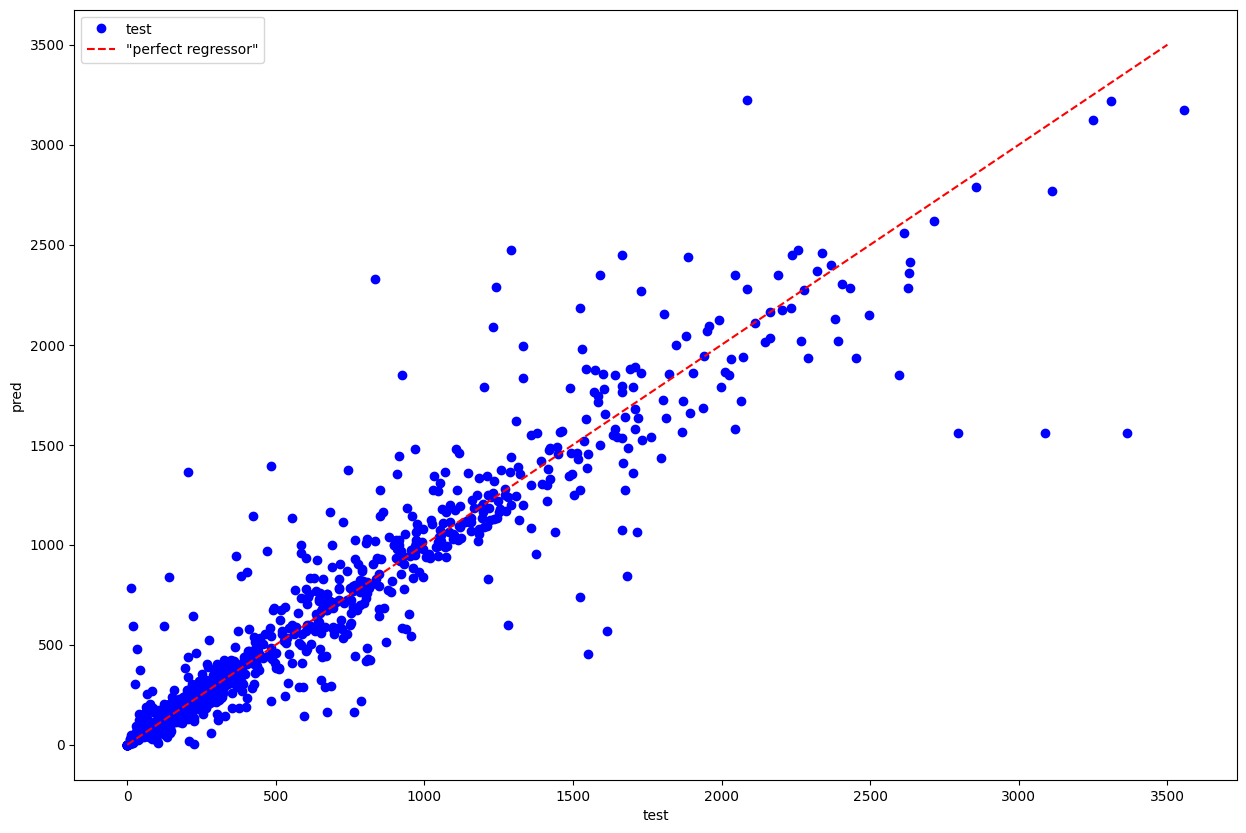

In [139]:
y_pred = dtr.predict(X_test)

plt.figure(figsize=(15,10))

plt.plot(y_test, y_pred, c='b', marker='o', linestyle='')
plt.plot([0,3500], [0, 3500], c='r', linestyle='--')
plt.xlabel('test')
plt.ylabel('pred')

plt.legend(["test", '"perfect regressor"'])

To be more sure, let us do a cross validation experiment

In [140]:
kfold = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=1
)

reg = DecisionTreeRegressor(
    random_state=1,
    min_samples_leaf = 3,
)

scores = cross_val_score(
    reg,
    X, y, 
    cv=kfold
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[0.86107542 0.84632268 0.86826205 0.88410959 0.8886347 ]
mu:0.8696808894603171


## Slide's example

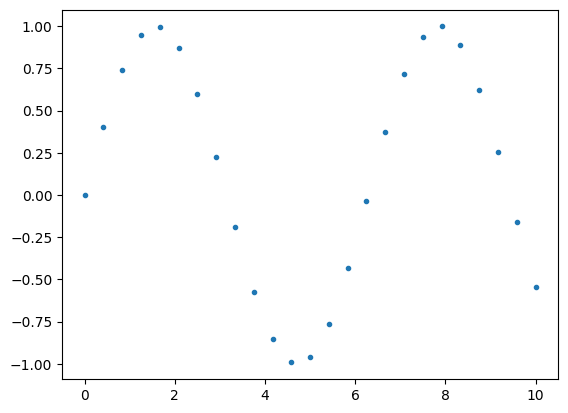

In [141]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt


n = 25
a, b = 0, 10
x = np.linspace(a, b, n)
y = np.sin(x)
plt.plot(x, y, ".")

Text(0, 0.5, 'target')

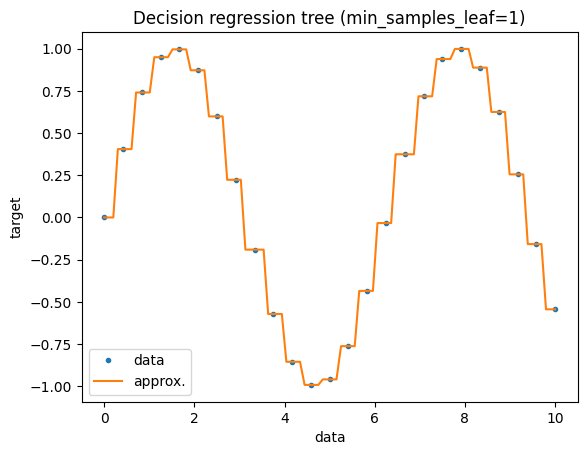

In [142]:
model = DecisionTreeRegressor(min_samples_leaf=1).fit(x.reshape(-1, 1), y)

x_hat = np.linspace(a, b, 100).reshape(-1, 1)
y_hat = model.predict(x_hat)
plt.plot(x, y, ".")
plt.plot(x_hat, y_hat)

plt.legend(["data", "approx."])
plt.title("Decision regression tree (min_samples_leaf=1)")
plt.xlabel('data')
plt.ylabel('target')

Text(0, 0.5, 'target')

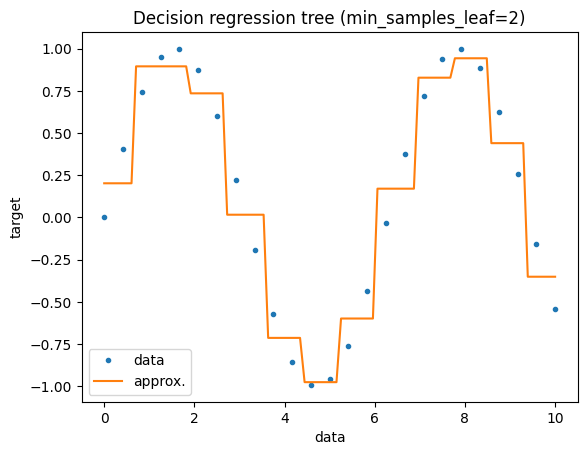

In [143]:
model = DecisionTreeRegressor(min_samples_leaf=2).fit(x.reshape(-1, 1), y)

x_hat = np.linspace(a, b, 100).reshape(-1, 1)
y_hat = model.predict(x_hat)
plt.plot(x, y, ".")
plt.plot(x_hat, y_hat)

plt.legend(["data", "approx."])
plt.title("Decision regression tree (min_samples_leaf=2)")
plt.xlabel('data')
plt.ylabel('target')

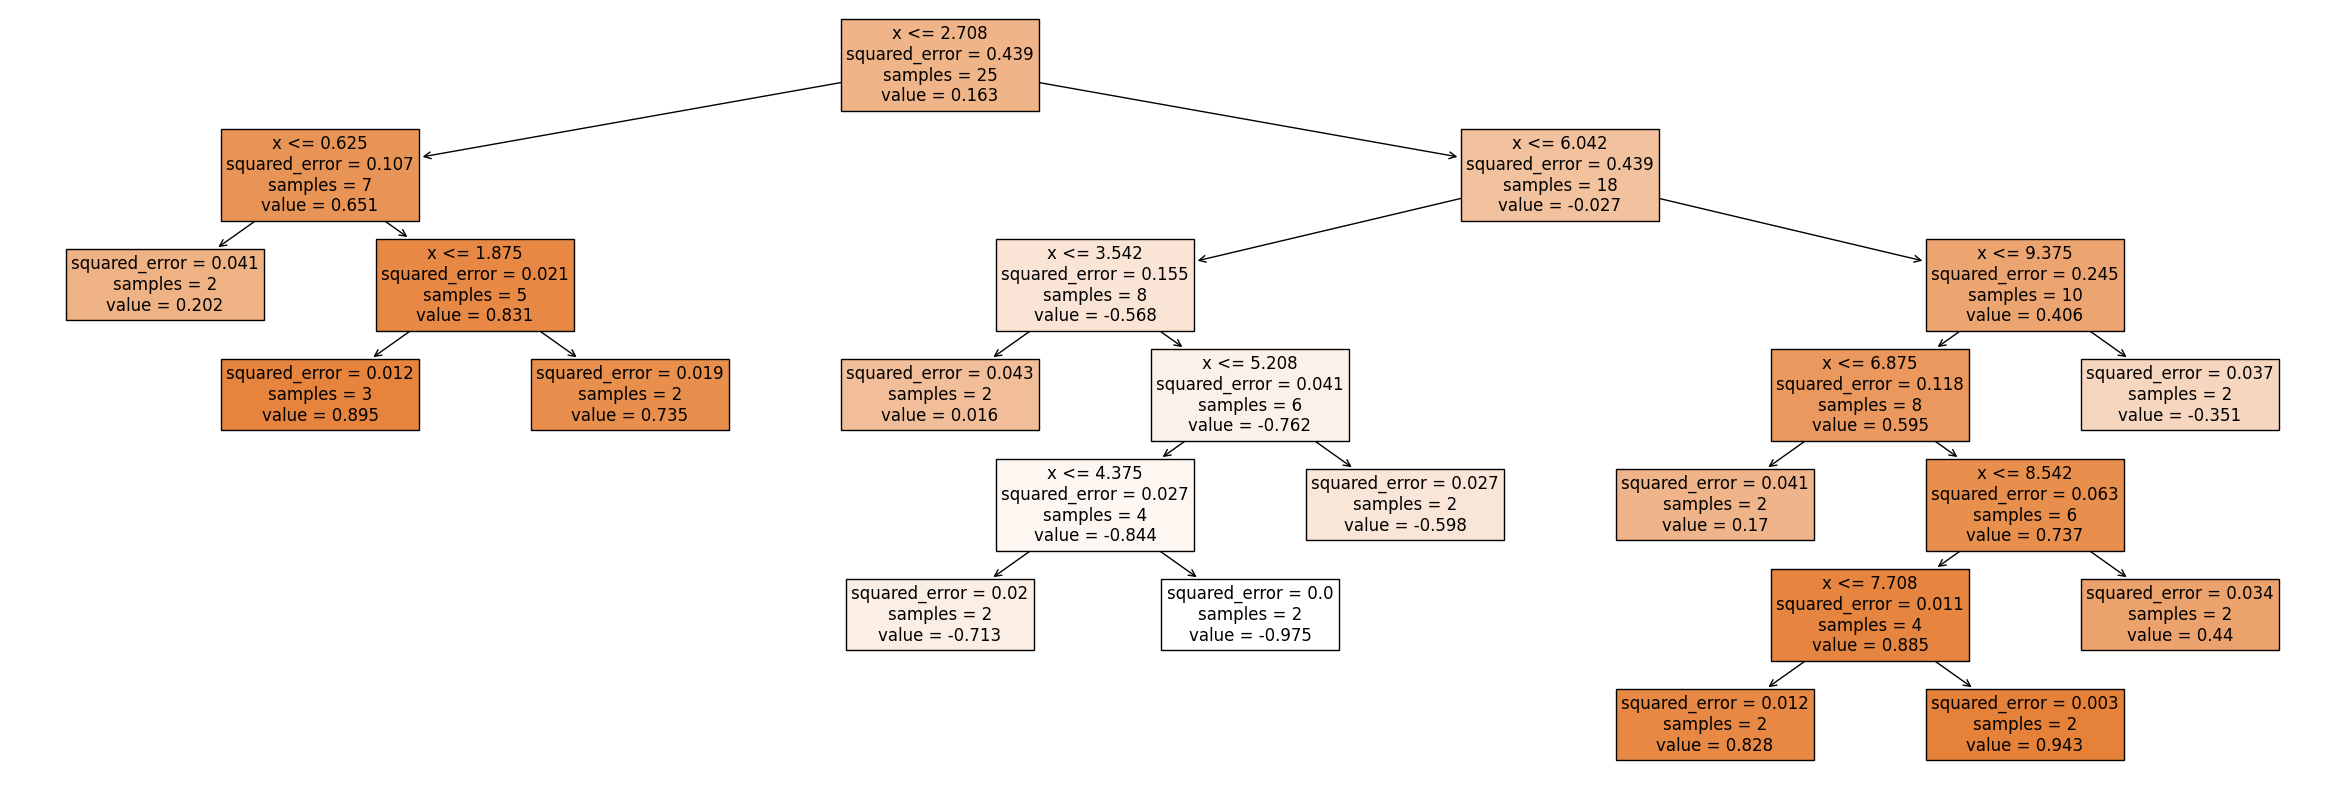

In [144]:
fig, axes = plt.subplots(figsize = (30, 10))

tree.plot_tree(
    model,
    feature_names=["x"],
    filled=True,
    fontsize=12
)
plt.show()

# Random Forest
## Classification

In [145]:
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target, 
                                                    train_size=.75,
                                                    random_state=42)

rfc = RandomForestClassifier(
        n_estimators=100,
        n_jobs=-1,
        min_samples_leaf = 1,
        max_leaf_nodes = 5,
).fit(X_train, y_train)

In [146]:
scores = rfc.score(X_train, y_train)
print(f'scores:{scores}\nmu:{scores.mean()}')      

scores:0.9642857142857143
mu:0.9642857142857143


In [147]:
scores = rfc.score(X_test, y_test)
print(f'scores:{scores}\nmu:{scores.mean()}')      

scores:1.0
mu:1.0


In [148]:
sss = StratifiedShuffleSplit(
    n_splits=5, 
    random_state=42
)

rfc = RandomForestClassifier(
        n_estimators=20,
        n_jobs=-1,
        min_samples_leaf = 1,
#         max_leaf_nodes = 5,
)

scores = cross_val_score(
    rfc,  
    iris.data, 
    iris.target, 
    cv=sss
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[0.86666667 0.93333333 1.         1.         1.        ]
mu:0.96


## Regression

In [149]:
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('./../Datasets/SeoulBikeData.csv')

# transform categorical columns into dummy variables
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

# make sure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# create new columns for month, day, and day of week
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week

# drop the original date column
df.drop('Date', axis=1, inplace=True)


# Get X and y data
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=True,
                                                    random_state=1,
                                                    test_size=0.1)

X_train

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,month,day,day_of_week
6528,0,24.7,94,2.8,1270,23.6,0.00,0.0,0.0,False,True,False,True,True,8,30,3
8254,22,11.2,75,1.7,478,6.9,0.00,0.0,0.0,False,False,False,True,False,11,9,4
5937,9,29.1,76,2.2,1041,24.4,1.38,0.0,0.0,False,True,False,True,True,8,5,6
1756,4,-8.6,31,3.5,2000,-22.7,0.00,0.0,0.0,False,False,True,True,True,2,12,0
4209,9,19.5,44,1.3,995,6.9,1.88,0.0,0.0,True,False,False,True,True,5,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,15,18.9,28,3.7,1769,0.0,2.09,0.0,0.0,True,False,False,True,True,3,31,5
7813,13,19.4,35,1.2,678,3.5,1.73,0.0,0.0,False,False,False,True,True,10,22,0
905,17,2.3,33,0.2,1515,-12.3,0.13,0.0,0.0,False,False,True,True,True,1,7,6
5192,8,23.6,93,0.9,308,22.3,0.21,0.0,0.0,False,True,False,True,True,7,5,3


In [151]:
rfr = RandomForestRegressor( 
        n_estimators=10,
        n_jobs=-1,
        random_state=0).fit(X_train, y_train)

y_pred = rfr.predict(X_test)

score = rfr.score(X_test, y_test)
score        

0.9220434265621292

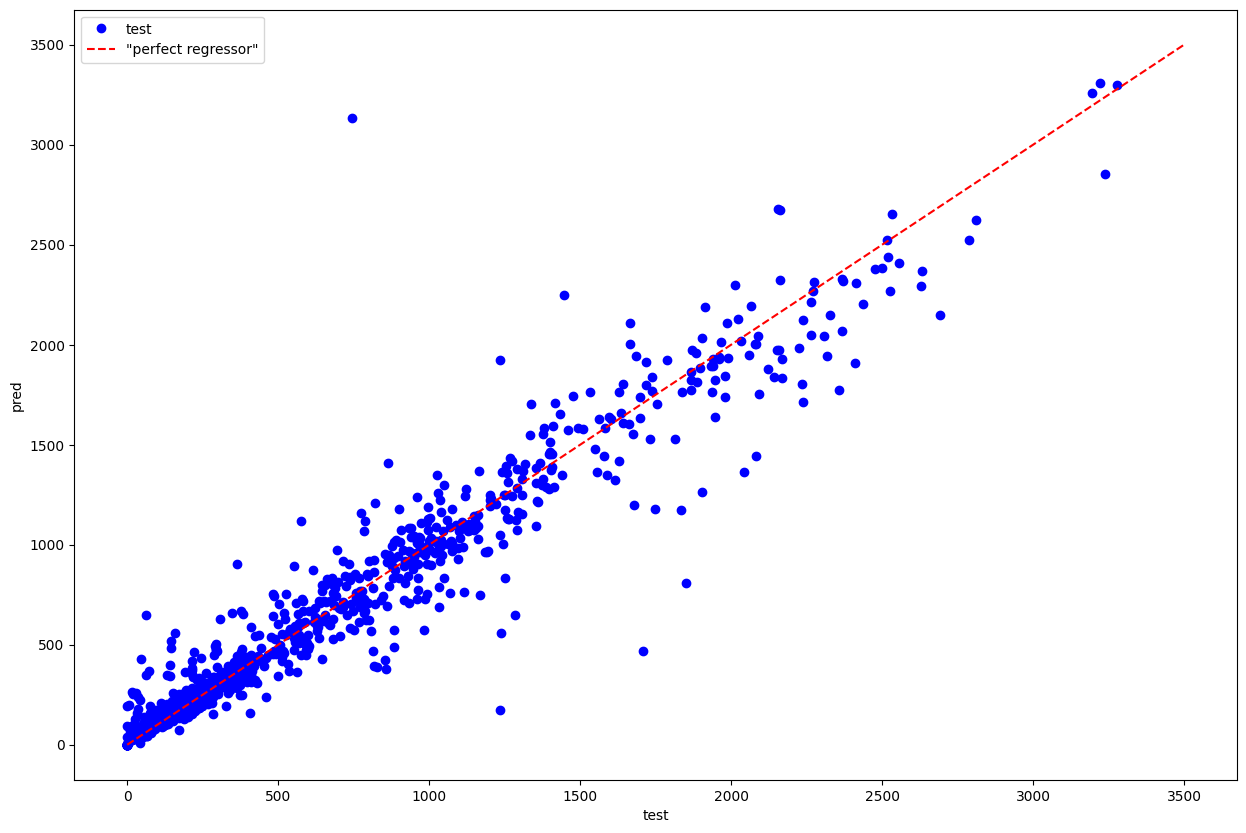

In [152]:
y_pred = rfr.predict(X_test)

plt.figure(figsize=(15,10))

plt.plot(y_test, y_pred, c='b', marker='o', linestyle='')
plt.plot([0,3500], [0, 3500], c='r', linestyle='--')
plt.xlabel('test')
plt.ylabel('pred')

plt.legend(["test", '"perfect regressor"'])

In [153]:
kfold = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)
scores = cross_val_score(rfr,  X, y, cv=kfold)
scores

array([0.91831249, 0.92070865, 0.92710629, 0.93183723, 0.92779282])

In [154]:
scores.mean()

0.9251514961706505